# 임포트 부분

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import re
import os
import scipy
from konlpy.tag import Okt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

## 데이터 가져오기

In [2]:
data = pd.read_csv('total_ex.csv', encoding='cp949')
x=data['data']
y=data['label']
print(x)

0      Game Designer(게임 디자이너)\n\n비디오 게임 제작자의 부류. 영어로는...
1      게임크리에이터, 게임디자이너\n게임기획자는 PC 게임, 네트워크 게임 등 게임용 소...
2      게임기획자란?\n실제 게임제작, 게임프로그래밍이나 그래픽 작업에 들어가기 전 어떤 ...
3      하는일\n컴퓨터 게임의 아이템과 스토리, 캐릭터 등을 구성 및 기획하고 제작 과정을...
4      게임기획자\n\n게임 기획자는 게임 회사의 기획팀에 속해서 일하는 사람들을 말합니다...
                             ...                        
118    안녕하세요. 자기소개 부탁드립니다.\n안녕하세요! 개발자 고영정이라고 합니다. 토스...
119    버즈빌에 대한 간단한 소개도 부탁드립니다.\n버즈빌은 글로벌 잠금 화면 광고 플랫폼...
120    반갑습니다. 자기소개 부탁 드립니다.\n안녕하세요. 캐시슬라이드에서 제품길드의 클라...
121    안녕하세요. 간단한 자기소개 부탁 드립니다.\n안녕하세요! 와이즈솔루션 테크니컬 파...
122    모바일 앱이란?\n모바일 앱은 응용 프로그램(application program)들...
Name: data, Length: 123, dtype: object


## 형태소 분석

In [3]:
okt = Okt()
#의미가있는 값(단어)로 나누어주는 역할
morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in x]

## 특수문자, 불용어 제거

In [4]:
stopwords = ['을', '를', '이', '가', '은', '는','이','그','있','n','nn','t','의','되','라','한','다','하','더','에','서','나',
            '과','고','며','와','지','해','도','지','못','안','않','로','들','된','것','에는','안녕',
            '반갑','내','등','할','자','있다','','직','군','위','식','각','출','창','시','수','및','신','영','화','살','여','양','송','대','데',
            '연','구','살','장','또','적','D','력','인','향','년','후','생','기','봐','문','니','사','본','제','작','관','일','분','야',
            '중','거','명','어','개','타','제','또는','요','전','몇','중','에서','있는데요','된다','또한','되','돼','않','으로','만','있습니다','하는','하는것이',
            '만','푹','지금','하는','곳','로는','한다','이다','에서는','이라','고하','에서보다','이라고도','경','제등','이서','이라는',
            '가는','되는','마다','야하며','야한다','필요하다','되었을','필요한다','게','하고','좋아하고','원하는','통해','하여이에','고도',
            '세','드리지','않습니다','잉','님','합니다']
#stopwords에 추가할 단어 kor_stopword.txt파일에서 읽어와 추가
f = open('./kor_stopword.txt',encoding='UTF8')
lines = f.readlines()
for line in lines:
    line = line.strip()
    stopwords.append(line)
f.close()
tf_main=[]
for i, document in enumerate(morph_tokenized_sentences):
    temp_str = ''
    for doc in document:
        doc = re.sub(r'[^ ㄱ-ㅣ가-힣A-Za-z]', '', str(doc))
        if doc not in stopwords:
            temp_str = temp_str + ''.join(list(doc)) + ' '
    tf_main.append(temp_str)

print(tf_main)

['GameDesigner 게임 디자이너 비디오 게임제작자 부류 영어 게임 디자이너 외래어 디자인 본래 설계 계획 그래픽 담당 그래픽 아트 사운드 포함 넓은 의미 아트 디자인 게임 다양한 분야 영역 믹스 영화 영역 진보 현대 프러덕션 그래픽 음악 연기 스토리 촬영 컴퓨터 사이언스 다양한 영역 필요 게임 반영 영역 섞여 게임 결과물 바뀌도록 관리 해나 기획 기획 요구 역량 게임 기본 프로젝트 관리 역량 개발 게임 필요한 능력 전반 시스템 게임 기반 시스템 프로그램 개발 요소 책임진다 프로그래밍 관련 지식 시나리오 게임 기반 스토리 캐릭터 퀘스트 text 등장 캐릭터 요소 책임진다 문화 예술 관련 지식 레벨 디자인 게임 기반 맵 사이즈 배치 요소 담당 건축 크기 공간 지식 플레이 타임 계산 게임 지식 운영 게임 운영 업무 기획 내용 반영 운영 관련 내용 담당 라이브 기획 가주 기획 업무 병행 업무 밸런싱 게임 수치 담당 데이터 수학 지식 게임 룰 수치화 통찰 게임 경제 게임 경제 시뮬레이션 능력 지식 게임 몬스터 드랍 획득 게임머니 요소 담당 ',
 '게임 크리에이터 게임 디자이너 게임 기획 PC 게임 네트워크 게임 임용 소프트웨어 제작 관련 모든 사항 총괄 지휘 감독 담당 게임 시장조사 소비자 게임 인지 파악 새로운 게임제작 아이디어 구상 기획 작성 게임 장르 대상 연령 층 게임 난이도 게임 캐릭터 역할 특징 기본 스토리 전개 설정 그래픽디자이너 프로그래머 본격 게임 프로그램 제작 게임 소프트웨어 베타테스트 연회 참여 홍보 업무 대사 작성 등세 부적 게임 시나리오 작성 기획 쉽게 그래픽디자이너 프로그래머 전달 게임 제작 상품화 시장 진입 판매 고의 수익 판단 결정 게임 제작 완료 게임 홍보 마케팅 전략 배급 계획 수립 실행 장조 바탕 게임 즐기는 원하는지 파악 통찰 새로운 게임 소재 발굴 창의력 기획 요구 게임 산업 전반 지식 이해 마케팅 홍보 본적지 게임 좋아해야하고 영화 만화 소설 다양한 문화 장르 지식 요구 게임 개발 보통 팀 단위 팀원 원활한 관계 유지 

## TF-IDF 벡터화

In [5]:
vect = TfidfVectorizer()
tf_main_v = vect.fit_transform(tf_main)
tf_main_v.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.04577728, 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [6]:
print(tf_main_v)

  (0, 796)	0.09229666719435295
  (0, 7899)	0.08499764295751261
  (0, 2220)	0.09229666719435295
  (0, 2938)	0.06974491838240723
  (0, 4169)	0.07580195994038749
  (0, 841)	0.14503975721757226
  (0, 7033)	0.07580195994038749
  (0, 4063)	0.09229666719435295
  (0, 4067)	0.061608459025189806
  (0, 1931)	0.047564349911333154
  (0, 4062)	0.07251987860878613
  (0, 3243)	0.09229666719435295
  (0, 3305)	0.06734113849689997
  (0, 489)	0.09229666719435295
  (0, 2437)	0.06974491838240723
  (0, 1480)	0.07673733378841606
  (0, 4730)	0.0763391873840439
  (0, 5130)	0.11931630018324395
  (0, 846)	0.07580195994038749
  (0, 6971)	0.08499764295751261
  (0, 7243)	0.05084643124293452
  (0, 923)	0.07251987860878613
  (0, 6929)	0.07580195994038749
  (0, 758)	0.08499764295751261
  (0, 3236)	0.06332419559166101
  :	:
  (122, 4085)	0.04560583756300575
  (122, 1038)	0.0419616514018186
  (122, 2686)	0.03525710383153629
  (122, 2586)	0.02734117540082107
  (122, 7893)	0.023928668023250763
  (122, 318)	0.03370724010641

## Y라벨 변환

In [7]:
enc = LabelEncoder()
enc.fit(y)
Y_label = enc.transform(y)
y_train = tf.keras.utils.to_categorical(Y_label)

## 트레인 테스트 나누기

In [8]:
#벡터정렬
scipy.sparse.csr_matrix.sort_indices(tf_main_v)

In [9]:
X_train, X_eval, Y_train, Y_eval = train_test_split(tf_main_v, y_train, test_size=0.2, stratify=y_train,
                                                    random_state=666)
print(X_train.shape)
print(X_eval)

(98, 7974)
  (0, 41)	0.11372519466550632
  (0, 49)	0.11372519466550632
  (0, 180)	0.11372519466550632
  (0, 220)	0.0934009093968121
  (0, 276)	0.10473155516111364
  (0, 474)	0.09835046638240254
  (0, 626)	0.0803631873736172
  (0, 654)	0.11372519466550632
  (0, 662)	0.07591210179808378
  (0, 712)	0.0934009093968121
  (0, 781)	0.08593760382774045
  (0, 823)	0.0577018958450141
  (0, 829)	0.10586100163051329
  (0, 837)	0.08593760382774045
  (0, 844)	0.04619450775714024
  (0, 849)	0.1380650832186313
  (0, 935)	0.044176658719344335
  (0, 974)	0.10750634971274672
  (0, 983)	0.11037629452306581
  (0, 1003)	0.09567659993337847
  (0, 1030)	0.05599481958612076
  (0, 1039)	0.09801198589712906
  (0, 1180)	0.05955138700244811
  (0, 1199)	0.05365781332621188
  (0, 1203)	0.041034702332468656
  :	:
  (24, 7231)	0.014184539272478798
  (24, 7257)	0.06284567602639167
  (24, 7283)	0.02319601946798461
  (24, 7329)	0.03412121938317419
  (24, 7332)	0.028023279533530027
  (24, 7385)	0.04979078508494674
  (24, 

## 모델 정의

In [55]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils

In [65]:
model = Sequential()
model.add(Dense(98,input_shape=(98,7974),activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(3, activation='softmax'))
# 모델의 컴파일
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 98, 98)            781550    
_________________________________________________________________
dense_56 (Dense)             (None, 98, 50)            4950      
_________________________________________________________________
dense_57 (Dense)             (None, 98, 30)            1530      
_________________________________________________________________
dense_58 (Dense)             (None, 98, 10)            310       
_________________________________________________________________
dense_59 (Dense)             (None, 98, 3)             33        
Total params: 788,373
Trainable params: 788,373
Non-trainable params: 0
_________________________________________________________________


In [66]:
MODEL_DIR = './model_tf-idf_end/'
if not os.path.exists(MODEL_DIR):
     os.mkdir(MODEL_DIR)
modelpath = MODEL_DIR + "최종tf-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath,monitor='val_loss',verbose=1,save_best_only=False)
history = model.fit(X_train, Y_train, epochs=20, batch_size = 10,
                    validation_data=(X_eval, Y_eval), verbose=1,callbacks=[checkpointer])
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_eval, Y_eval)[1]))
print(np.argmax(model.predict(X_eval), axis=1))

Epoch 1/20
 1/10 [==>...........................] - ETA: 0s - loss: 1.0970 - accuracy: 0.4000
Epoch 00001: saving model to ./model_tf-idf_end\최종tf-01-1.0823.hdf5
10/10 [==============================] - 0s 15ms/step - loss: 1.0932 - accuracy: 0.3571 - val_loss: 1.0823 - val_accuracy: 0.5600
Epoch 2/20
 1/10 [==>...........................] - ETA: 0s - loss: 1.0692 - accuracy: 0.7000
Epoch 00002: saving model to ./model_tf-idf_end\최종tf-02-1.0446.hdf5
10/10 [==============================] - 0s 11ms/step - loss: 1.0485 - accuracy: 0.7449 - val_loss: 1.0446 - val_accuracy: 0.6000
Epoch 3/20
 1/10 [==>...........................] - ETA: 0s - loss: 0.9477 - accuracy: 1.0000
Epoch 00003: saving model to ./model_tf-idf_end\최종tf-03-0.9778.hdf5
10/10 [==============================] - 0s 7ms/step - loss: 0.9516 - accuracy: 0.8878 - val_loss: 0.9778 - val_accuracy: 0.8000
Epoch 4/20
 1/10 [==>...........................] - ETA: 0s - loss: 0.7983 - accuracy: 1.0000
Epoch 00004: saving model to ./

# 결과 그래프화

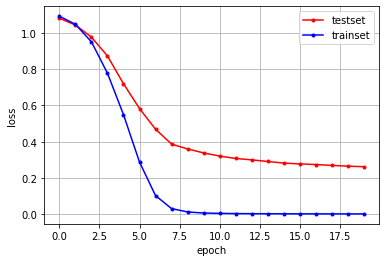

In [67]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))
import matplotlib.pyplot as plt
#크로스되는 부분으로 에폭을 조정해야 오버피팅을 막을수 있음
plt.plot(x_len,y_vloss,marker='.',c='red',label='testset')
plt.plot(x_len,y_loss,marker='.',c='blue',label='trainset')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 입력데이터 분류를 위한 준비

In [68]:
from tensorflow.keras.models import load_model
ac_label=['game','mobile','web']

# 입력값 TF-IDF 벡터화 함수

In [71]:
def word_predict2(word,tf2,to_tf):
    loaded_model = load_model('./model_tf-idf_end/tf-200-0.2624.hdf5')
    word_input = [okt.morphs(word.replace(' ', ''))]
    stopwords = ['을', '를', '이', '가', '은', '는','이','그','있','n','nn','t','의','되','라','한','다','하','더','에','서','나',
            '과','고','며','와','지','해','도','지','못','안','않','로','들','된','것','에는','안녕',
            '반갑','내','등','할','자','있다','','직','군','위','식','각','출','창','시','수','및','신','영','화','살','여','양','송','대','데',
            '연','구','살','장','또','적','D','력','인','향','년','후','생','기','봐','문','니','사','본','제','작','관','일','분','야',
            '중','거','명','어','개','타','제','또는','요','전','몇','중','에서','있는데요','된다','또한','되','돼','않','으로','만','있습니다','하는','하는것이',
            '만','푹','지금','하는','곳','로는','한다','이다','에서는','이라','고하','에서보다','이라고도','경','제등','이서','이라는',
            '가는','되는','마다','야하며','야한다','필요하다','되었을','필요한다','게','하고','좋아하고','원하는','통해','하여이에','고도',
            '세','드리지','않습니다','잉','님','합니다']
    f = open('./kor_stopword.txt',encoding='UTF8')
    lines = f.readlines()
    for line in lines:
        line = line.strip()
        stopwords.append(line)
    f.close()
    test_tt=[]
    for i, document in enumerate(word_input):
        temp_str = ''
        for doc in document:
            doc = re.sub(r'[^ ㄱ-ㅣ가-힣A-Za-z]', '', str(doc))
            if doc not in stopwords:
                temp_str = temp_str + ''.join(list(doc)) + ' '
        test_tt.append(temp_str)
    print(test_tt)
    vect = TfidfVectorizer(min_df=1,decode_error='ignore')
    tf2_input = vect.fit_transform(to_tf)
    new_vect = vect.transform(test_tt)
    scipy.sparse.csr_matrix.sort_indices(tf2_input)
    scipy.sparse.csr_matrix.sort_indices(new_vect)
    print('뉴벡터',new_vect)

    print(ac_label[np.argmax(model.predict(new_vect), axis=1)[0]])
    webtest=ac_label[np.argmax(model.predict(new_vect), axis=1)[0]]
    return webtest



# 입력창

In [72]:
word_predict2("""게임게임개발자웹디자인웹마스터""",tf_main_v,tf_main)

['게임 게임개발자 웹디자인 웹마스터 ']
뉴벡터   (0, 791)	0.29460587450988723
  (0, 794)	0.6124673491294389
  (0, 5185)	0.5638355233322975
  (0, 5186)	0.46923408612676143
web


'web'

# pickle 파일 생성하여 데이터 바이너리형태로 저장
- 나중에 데이터를 이용할 때 피클파일 불러와 사용하면 편리

In [21]:
import pickle
with open('tf_main.pickle','wb') as f:
    pickle.dump(tf_main_v,f,pickle.HIGHEST_PROTOCOL)
    pickle.dump(tf_main,f,pickle.HIGHEST_PROTOCOL)

In [22]:
with open('tf_main.pickle', 'rb') as f:
    pictest = pickle.load(f)
    pictest2 = pickle.load(f)

In [23]:
print(pictest)

  (0, 116)	0.09229666719435295
  (0, 305)	0.09229666719435295
  (0, 489)	0.09229666719435295
  (0, 700)	0.04374791928048516
  (0, 758)	0.08499764295751261
  (0, 791)	0.5333273630329659
  (0, 796)	0.09229666719435295
  (0, 802)	0.08499764295751261
  (0, 818)	0.05486337414817349
  (0, 841)	0.14503975721757226
  (0, 846)	0.07580195994038749
  (0, 862)	0.05176979305985871
  (0, 923)	0.07251987860878613
  (0, 974)	0.08724960031857097
  (0, 976)	0.07093116159556523
  (0, 1090)	0.127156829398341
  (0, 1199)	0.13064222101828254
  (0, 1203)	0.03330278990278954
  (0, 1231)	0.13526349876064364
  (0, 1480)	0.07673733378841606
  (0, 1503)	0.07981890284562647
  (0, 1686)	0.06527197484499572
  (0, 1764)	0.06462325067245556
  (0, 1830)	0.15839962563279655
  (0, 1931)	0.047564349911333154
  :	:
  (122, 6540)	0.0419616514018186
  (122, 6589)	0.05552978860945986
  (122, 6627)	0.04051543028719468
  (122, 6633)	0.04560583756300575
  (122, 6893)	0.020886335033044746
  (122, 6966)	0.05113837031400199
  (122,

In [24]:
print(pictest2)

['GameDesigner 게임 디자이너 비디오 게임제작자 부류 영어 게임 디자이너 외래어 디자인 본래 설계 계획 그래픽 담당 그래픽 아트 사운드 포함 넓은 의미 아트 디자인 게임 다양한 분야 영역 믹스 영화 영역 진보 현대 프러덕션 그래픽 음악 연기 스토리 촬영 컴퓨터 사이언스 다양한 영역 필요 게임 반영 영역 섞여 게임 결과물 바뀌도록 관리 해나 기획 기획 요구 역량 게임 기본 프로젝트 관리 역량 개발 게임 필요한 능력 전반 시스템 게임 기반 시스템 프로그램 개발 요소 책임진다 프로그래밍 관련 지식 시나리오 게임 기반 스토리 캐릭터 퀘스트 text 등장 캐릭터 요소 책임진다 문화 예술 관련 지식 레벨 디자인 게임 기반 맵 사이즈 배치 요소 담당 건축 크기 공간 지식 플레이 타임 계산 게임 지식 운영 게임 운영 업무 기획 내용 반영 운영 관련 내용 담당 라이브 기획 가주 기획 업무 병행 업무 밸런싱 게임 수치 담당 데이터 수학 지식 게임 룰 수치화 통찰 게임 경제 게임 경제 시뮬레이션 능력 지식 게임 몬스터 드랍 획득 게임머니 요소 담당 ', '게임 크리에이터 게임 디자이너 게임 기획 PC 게임 네트워크 게임 임용 소프트웨어 제작 관련 모든 사항 총괄 지휘 감독 담당 게임 시장조사 소비자 게임 인지 파악 새로운 게임제작 아이디어 구상 기획 작성 게임 장르 대상 연령 층 게임 난이도 게임 캐릭터 역할 특징 기본 스토리 전개 설정 그래픽디자이너 프로그래머 본격 게임 프로그램 제작 게임 소프트웨어 베타테스트 연회 참여 홍보 업무 대사 작성 등세 부적 게임 시나리오 작성 기획 쉽게 그래픽디자이너 프로그래머 전달 게임 제작 상품화 시장 진입 판매 고의 수익 판단 결정 게임 제작 완료 게임 홍보 마케팅 전략 배급 계획 수립 실행 장조 바탕 게임 즐기는 원하는지 파악 통찰 새로운 게임 소재 발굴 창의력 기획 요구 게임 산업 전반 지식 이해 마케팅 홍보 본적지 게임 좋아해야하고 영화 만화 소설 다양한 문화 장르 지식 요구 게임 개발 보통 팀 단위 팀원 원활한 관계 유지 관